## Mini-Project-1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Description of the Wine Dataset:-

In [10]:
print("Wine Dataset Description:-\n")
print(wine.DESCR)

Wine Dataset Description:-

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                

### Data provided in the Wine Dataset:-

In [11]:
wine = load_wine()

wine_data = load_wine(as_frame=True)
wine_df = wine_data.frame

print(wine_df.head())

print("Shape of the Wine DataFrame:-", wine_df.shape)

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [22]:
# X is the feature matrix that we have obtained from wine.data, X.shape[0] denotes the no. of rows or the number of wine samples in the dataset(178).
# On the other hand, X.shape[1] denotes the no. of columns or the number of attributes that are recorded per wine.
# wine.feature_names contains the names of the features(like hue, alcohol, etc) used in the dataset
# wine.target_names contains the names of the wine classes(class_0, class_1, class_2)
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Feature names:\n{wine.feature_names}")
print(f"Target classes: {wine.target_names}")

Number of samples: 178
Number of features: 13
Feature names:
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target classes: ['class_0' 'class_1' 'class_2']


### Classification/Regression Problem?

In [24]:
np.unique(wine.target)
# We can see above, that we have 3 target classes('class_0' 'class_1' 'class_2'), the aim of this dataset is to predict
# to which class amongst these 3, will our wine sample lie.
# Moreover, these are discrete values and not values on a continuous scale, which is the case in regression problems.
# This concludes that the Wine Dataset is a Classification Problem, because its target variable represents distinct wine classes, 
# and the goal is to predict which class a sample belongs to.

array([0, 1, 2])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape)
print(X_test.shape)

# Scaling all 13 features to standard normal distribution (mean = 0, std dev. = 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(142, 13)
(36, 13)


### Dimensionality Reduction by PCA:-

In [29]:
from sklearn.decomposition import PCA

In [31]:
# PCA is a statistical technique used to reduce the number of input features (dimensions) in a dataset while preserving as much 
# variance (information) as possible. We have 13 features in the Wine dataset, our aim is to reduce it to 2 principal features for easier computation.
# These 2 features would capture most of the variance, allowing us to visualize and classify the data efficiently.
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

pca_df = pd.DataFrame(X_train_pca, columns=['Feature1', 'Feature2'])
pca_df['Target'] = y_train.values

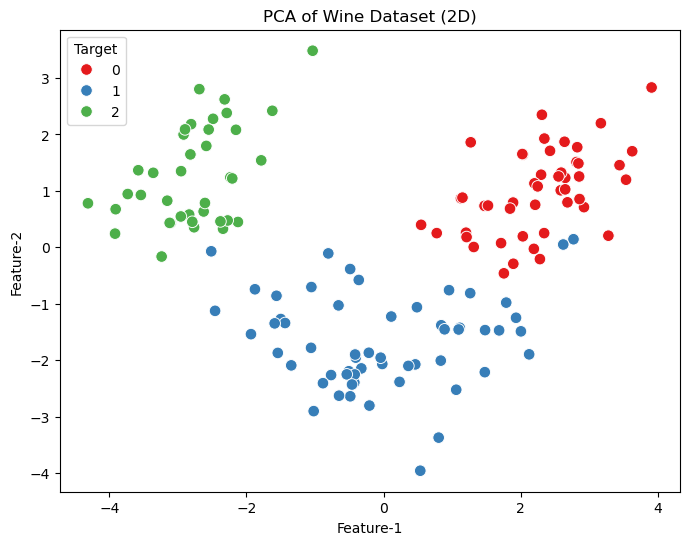

In [32]:
# Plotting the 3 target wine classes ,with Feature-1 on the x-axis and Feature-2 on the y-axis, to see how the new 2 features obtained from PCA
# separate the target wine classes.
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='Feature1', y='Feature2', hue='Target', palette='Set1', s=70)
plt.title("PCA of Wine Dataset (2D)")
plt.xlabel("Feature-1")
plt.ylabel("Feature-2")
plt.show()

### Classification using various Algorithms:-

#### 1. Support Vector Machine (SVM):-

In [33]:
from sklearn.svm import SVC

In [50]:
# SVM aims to differentiate data points of different classes by finding the most optimal hyperplane that separates each class. It achieves this by 
# maximizing the margin(the distance between the hyperplane and the nearest data points) from each class. For non-linearly separable data, SVM uses 
# kernel functions (like RBF) to project the data into a higher-dimensional space where a linear separator can be found.
# In our problem, the algorithm will try to find the best straight line (hyperplane in 2D) that separates the wine classes, but we have to use the rbf
# kernel, since from the scatter plot obtained before, we can see that the wine classes cannot be separated by a linear demarcator.
svm = SVC(kernel='rbf', C=1)
svm.fit(X_train_pca, y_train)
y_pred_by_svm = svm.predict(X_test_pca)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_by_svm))
print(classification_report(y_test, y_pred_by_svm))

SVM Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.93      0.93      0.93        14
           2       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36



#### 2. Naive Bayes:-

In [36]:
from sklearn.naive_bayes import GaussianNB

In [47]:
# Naive Bayes is a supervised machine learning algorithm based on Bayes' Theorem, assuming that the features are conditionally independent 
# given the class. In our case (Wine dataset), Naive Bayes now models the probability of a wine belonging to a certain class (0, 1, or 2) based on the
# likelihood of these 2 PCA-transformed features, and classifies accordingly.
NB = GaussianNB()
NB.fit(X_train_pca, y_train)
y_pred_by_NB = NB.predict(X_test_pca)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_by_NB))
print(classification_report(y_test, y_pred_by_NB))

Naive Bayes Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.93      0.93      0.93        14
           2       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36



#### 3. Linear Discriminant Analysis (LDA):-

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [53]:
# Linear Discriminant Analysis (LDA) is a supervised dimensionality reduction technique that projects high-dimensional data onto a lower-dimensional
# space in a way that maximizes class separability. LDA works by maximizing the ratio of between-class variance to within-class variance,
# ensuring that data points from different classes are as far apart as possible, while those from the same class stay tightly clustered.
# In our Wine Dataset, LDA helps transform the 13 original features into a lower-dimensional space, on which we could have further fed into 
# classifiers like SVM, Naive Bayes, etc. In this case, we are feeding our PCA reduced features, into the LDA, instead of passing 
# the 13 original features.
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca, y_train)
y_pred_by_lda = lda.predict(X_test_pca)
print("LDA Accuracy:", accuracy_score(y_test, y_pred_by_lda))
print(classification_report(y_test, y_pred_by_lda))

LDA Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.93      0.93      0.93        14
           2       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36



#### 4. Quadratic Discriminant Analysis (QDA):-

In [41]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [57]:
# Quadratic Discriminant Analysis (QDA) is a supervised classification algorithm that models each class using its own Gaussian distribution with 
# its own mean and covariance matrix. Unlike Linear Discriminant Analysis (LDA), which assumes all classes share the same covariance matrix
# (leading to linear decision boundaries), QDA allows each class to have a different covariance.
# In our case (Wine dataset), QDA attempts to classify each wine sample into one of the three classes (0, 1, 2) based on the distribution of the 
# PCA-reduced features. Since we reduced the feature space to 2D using PCA, QDA will model each class as a 2D Gaussian and 
# draw curved decision boundaries accordingly.
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_pca, y_train)
y_pred_by_qda = qda.predict(X_test_pca)
print("QDA Accuracy:", accuracy_score(y_test, y_pred_by_qda))
print(classification_report(y_test, y_pred_by_qda))

QDA Accuracy: 0.9166666666666666
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.87      0.93      0.90        14
           2       1.00      0.90      0.95        10

    accuracy                           0.92        36
   macro avg       0.93      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



#### 5. K-Nearest Neighbors (KNN):-

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
# K-Nearest Neighbors (KNN) is a simple, non-parametric, instance-based learning algorithm. It classifies a new data point based on the 
# majority class among its 'k' closest points (neighbors) in the training set, using Euclidean distance.
# In our case (Wine dataset), we've reduced the original 13 features to just 2 using PCA. This makes the dataset low-dimensional and highly visualizable 
# ideal for KNN. The algorithm will classify a test wine sample based on the majority vote of its k closest training samples in this 2D PCA space.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)
y_pred_by_knn = knn.predict(X_test_pca)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_by_knn))
print(classification_report(y_test, y_pred_by_knn))

KNN Accuracy: 0.9166666666666666
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.87      0.93      0.90        14
           2       1.00      0.90      0.95        10

    accuracy                           0.92        36
   macro avg       0.93      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



### Comparing Accuracies of the above Classification Problems

In [65]:
results = {
    "SVM ": accuracy_score(y_test, y_pred_by_svm),
    "Naive Bayes ": accuracy_score(y_test, y_pred_by_NB),
    "LDA ": accuracy_score(y_test, y_pred_by_lda),
    "QDA ": accuracy_score(y_test, y_pred_by_qda),
    "KNN ": accuracy_score(y_test, y_pred_by_knn)
}

results_df = pd.DataFrame(results.items(), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)

print(results_df)

          Model  Accuracy
0          SVM   0.944444
1  Naive Bayes   0.944444
2          LDA   0.944444
3          QDA   0.916667
4          KNN   0.916667
